sgd方法：
Iteration	loss
0		4.75593049527
1		4.70282725476
2		4.64139581379
3		4.58811903985
4		4.54446403164
5		4.48966967997
6		4.44928538702
7		4.44936826904
8		4.44967536559
9		4.44976604613
10		4.44995921206
11		4.45000293093
12		4.39332246474
13		4.34231138824
14		4.34251549505
15		4.30014562784
16		4.245241326
17		4.18341551035
18		4.1269034624
19		4.12715081561
20		4.12757568096
21		4.07724035262
22		4.02961382738
23		3.97858391447
24		3.92065064941
25		3.92085700411
26		3.85825269111
27		3.85863666879
28		3.80032018545
29		3.73848387478
30		3.68809119114
31		3.63612789253
32		3.58642387676
33		3.53166896528
34		3.48321729978
35		3.43338039495
36		3.37497539927
37		3.32097326744
38		3.32146358335
39		3.27011740737
40		3.2167598552
41		3.16307105555
42		3.10834358224
43		3.05255048334
44		2.99528493745
45		2.99558774444
46		2.93840727339
47		2.88656512982
48		2.83552993176
49		2.78429606432
50		2.73618170901
51		2.68678182634
52		2.68792894995
53		2.68842154294
54		2.6375639192
55	

136		0.517531467097
137		0.531020097156
138		0.531036821246
139		0.480091613928
140		0.489536910527
141		0.489799758125
142		0.489941784136
143		0.547366768572
144		0.526011770246
145		0.525581314676
146		0.514349162787
147		0.514237960982
148		0.554541032893
149		0.578379751101
adadelta方法：
Iteration	loss
0		5.42917590229
1		5.23800789988
2		5.04067005682
3		4.89556738877
4		4.77771830462
5		4.65147303531
6		4.55524181621
7		4.55763672204
8		4.55857597204
9		4.55915591573
10		4.56752074323
11		4.57082075116
12		4.43007957774
13		4.31331801015
14		4.31923402211
15		4.22861026096
16		4.10346414306
17		3.9798503817
18		3.87241584608
19		3.87323193175
20		3.87387819786
21		3.77202603102
22		3.68524943262
23		3.59130098767
24		3.48610404573
25		3.48906210388
26		3.37695163715
27		3.39145200285
28		3.28840166562
29		3.1917567882
30		3.10550251113
31		3.01144155389
32		2.93166979985
33		2.84372671342
34		2.76492239819
35		2.69226641782
36		2.60636732145
37		2.52517547221
38		2.53029058167
39	

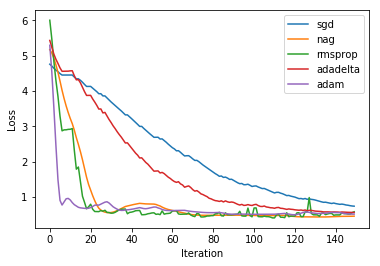

In [9]:
from sklearn import datasets as ds
import numpy as np
from numpy import random
import matplotlib.pyplot as plt


def sigmoid(input_):
    return 1 / (1 + np.exp(-input_))


def train(x_train, y_train, x_test, y_test, method, iters, test_errors):
    max_iterations = 150
    w = random.rand(num_features + 1)
    num_test_samples, num_test_features = x_test.shape
    
    #随机梯度下降原始版本
    if method == 'sgd':
        lr = 0.01

        for i in range(max_iterations):
            output = sigmoid(np.dot(x_train[i], w))
            error = output - y_train[i]
            w = w - lr * np.dot(x_train[i], error)

            predict_error = 0
            for j in range(num_test_samples):
                predict_output = sigmoid(np.dot(x_test[j], w))
                predict_error -= y_test[j] * np.log(predict_output) + (1 - y_test[j]) * np.log(1 - predict_output)
            print(str(i) + '\t\t' + str(predict_error / num_test_samples))

            iters.append(i)
            test_errors.append(predict_error / num_test_samples)
    
    #nag方法优化
    if method == 'nag':
        lr = 0.01
        gamma = 0.9
        momentum = np.zeros(num_features + 1)

        for i in range(max_iterations):
            output = sigmoid(np.dot(x_train[i], w - lr * gamma * momentum))
            error = output - y_train[i]
            grad = np.dot(x_train[i], error)
            momentum = momentum * gamma + grad*lr
            w = w - momentum

            predict_error = 0
            for j in range(num_test_samples):
                predict_output = sigmoid(np.dot(x_test[j], w))
                predict_error -= y_test[j] * np.log(predict_output) + (1 - y_test[j]) * np.log(1 - predict_output)
            print(str(i) + '\t\t' + str(predict_error / num_test_samples))

            iters.append(i)
            test_errors.append(predict_error / num_test_samples)

    #rmsprop方法优化
    if method == 'rmsprop':
        lr = 0.1
        Gt = 1
        gamma = 0.95
        epsilon = 10e-7

        for i in range(max_iterations):
            output = sigmoid(np.dot(x_train[i], w))
            error = output - y_train[i]
            grad = np.dot(x_train[i], error)
            norm = grad * grad
            Gt = gamma* Gt + (1 - gamma) * norm
            w = w - lr * grad / (np.sqrt(Gt + epsilon))

            predict_error = 0
            for j in range(num_test_samples):
                predict_output = sigmoid(np.dot(x_test[j], w))
                predict_error -= y_test[j] * np.log(predict_output) + (1 - y_test[j]) * np.log(1 - predict_output)
            print(str(i) + '\t\t' + str(predict_error / num_test_samples))
            iters.append(i)
            test_errors.append(predict_error / num_test_samples)
    
    #adam方法优化
    if method == 'adam':
        epsilon = 10e-8
        beta = 0.9
        gama = 0.999
        lr = 0.1
        m = 0
        Gt = 0

        for i in range(max_iterations):
            output = sigmoid(np.dot(x_train[i], w))
            error = output - y_train[i]
            grad = np.dot(x_train[i], error)

            m = beta * m + (1 - beta) * grad
            Gt = gama * Gt + (1 - gama) * grad * grad
            m_hat = m / (1 - beta)
            Gt_hat = Gt / (1 - gama)
            delta_w = (-lr * m_hat) / (np.sqrt(Gt_hat) + epsilon)
            w = w + delta_w

            predict_error = 0
            for j in range(num_test_samples):
                predict_output = sigmoid(np.dot(x_test[j], w))
                predict_error -= y_test[j] * np.log(predict_output) + (1 - y_test[j]) * np.log(1 - predict_output)
            print(str(i) + '\t\t' + str(predict_error / num_test_samples))
            iters.append(i)
            test_errors.append(predict_error / num_test_samples)
    
    #adadelta方法优化
    if method == 'adadelta':
        Gt = 0
        delta_t = 0
        gamma = 0.95
        epsilon = 10e-7
        lr = 10

        for i in range(max_iterations):
            output = sigmoid(np.dot(x_train[i], w))
            error = output - y_train[i]
            grad = np.dot(x_train[i], error)

            Gt = gamma * Gt + (1 - gamma) * grad * grad
            delta_w = (-lr * grad * np.sqrt(delta_t + epsilon)) / (np.sqrt(Gt + epsilon))
            w = w + delta_w
            delta_t = gamma * delta_t + (1 - gamma) * delta_t * delta_t


            predict_error = 0
            for j in range(num_test_samples):
                predict_output = sigmoid(np.dot(x_test[j], w))
                predict_error -= y_test[j] * np.log(predict_output) + (1 - y_test[j]) * np.log(1 - predict_output)
            print(str(i) + '\t\t' + str(predict_error / num_test_samples))
            iters.append(i)
            test_errors.append(predict_error / num_test_samples)

def main():
    x_train, y_train = ds.load_svmlight_file('a9a.txt')
    x_test, y_test = ds.load_svmlight_file('a9a.t.txt')

    num_samples, num_features = x_train.shape
    num_test_samples, num_test_features = x_test.shape

    x_train = x_train.toarray()
    temp = np.ones(shape=[32561, 1], dtype=np.float32)
    x_train = np.concatenate([x_train, temp], axis=1)
    x_test = x_test.toarray()
    temp = np.zeros(shape=[16281, 1], dtype=np.float32)
    temp1 = np.ones(shape=[16281, 1], dtype=np.float32)
    x_test = np.concatenate([x_test, temp, temp1], axis=1)

    for i in range(0, len(y_train)):
        if y_train[i] == -1:
            y_train[i] = 0
    for i in range(0, len(y_test)):
        if y_test[i] == -1:
            y_test[i] = 0


    methods = ['sgd', 'nag', 'rmsprop', 'adadelta', 'adam']
    for method in methods:
        iters = []
        test_errors = []
        print(method+"方法：")
        print("Iteration"+'\t'+"loss")
        train(x_train, y_train, x_test, y_test, method, iters, test_errors)
        plt.plot(iters, test_errors, label=method)

    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

main()